# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto Wireless Transfer of Power(WTP)**



In [12]:
import numpy as np
from numpy import arange
from numpy import linalg
from cmath import *
import math
import matplotlib.pyplot as plt

A célula abaixo apresenta os dados base do códgio, entre eles a lista de capacitores a serem utilizados e seus títulos para as plotagens de gráficos, as frequências a serem testadas, a resistência de carga, estabelcida inicialmente como 5, k e a tensão inicial.

In [13]:
Capacitores = [150*1e-9, 0.1*1e-6, 0.47*1e-6, 1e-6, 4.7*1e-6]
Css = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']
fs = np.arange(1, 100*1e3, 10)
Rc = 5
k = 0.2
V1 = 8

#Simular diferentes numeros de Uf para chegar proximo do dobro em V2


Antes de começar o projeto, é necessário descobrir qual a melhor forma de posicionar o capacitor da bobina secundária: Em série ou em paralelo. Para tal, iremos utilizar a lista de capacitores disponíveis disponibilizada acima e iremos calcular valores de eficiência, corrente do transformador primário e secundário, e valores da tensão do secundário para descobrirmos qual a melhor forma de encaixar o capacitor no circuito


In [4]:
# Transoformador em série
def CalcularTransformadorSerie(V1, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)

    # Resistência mínima das bobinas
    R1 = 0.2
    R2 = 0.2
    
    # Efeito pelicular das bobinas
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, XL2 + R2 + XC2 + Rc]])
    V=np.array([V1,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Retorna I1 e I2
    return i[0], i[1], L1

def CalcularTransformadorParalelo(V1, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)
    
    # Resistência mínima das bobinas
    R1 = 0.2
    R2 = 0.2
    
    # Efeito pelicular das bobinas
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Impedância equivalente do capacitor 2 e resistor em paralelo
    Zeq_C2_RC = (Rc*XC2)/(Rc+XC2)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, R2 + XL2 + Zeq_C2_RC]])
    V=np.array([V1,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Corrente no resistor de carga
    i_rc = (XC2*i[1])/(Rc+XC2)
    
    # Retorna I1, I2, Zeq_C2_RC, I_RC
    return i[0], i[1], Zeq_C2_RC, i_rc

resultados_serie = {}
resultados_paralelo = {}

# Calculando os resultados de V2 e eficiência para cada configuração de 
for c in Capacitores:
    V2s_serie = []
    ns_serie = []
    
    V2s_paralelo = []
    ns_paralelo = []
    
    # Calculando para cada frequência
    for f in fs:
        # Calculando para transformador em série
        i1, i2, L1 = CalcularTransformadorSerie(V1, c, f)
        
        # Calculando V2 e eficiência
        V2 = i2*Rc
        s1 = V1*i1.conjugate()/2
        s2 = V2*i2.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_serie.append(abs(V2))
        ns_serie.append(n*100)
        resultados_serie[c] = {"V2": V2s_serie, "n": ns_serie}
        
        # Calculando para transformador em paralelo
        i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, c, f)
        
        # Calculando V2 e eficiência
        V2 = i2*Zeq_C2_RC
        s1 = V1*i1.conjugate()/2
        s2 = V2*i_rc.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_paralelo.append(abs(V2))
        ns_paralelo.append(n*100)
        resultados_paralelo[c] = {"V2": V2s_paralelo, "n": ns_paralelo}
        



Feitas as funções para realizar os cálculos para o capacitor em série ou em paralelo, os valores obtidos foram armazenados em listas e plotados em gráficos, como mostra o código a seguir

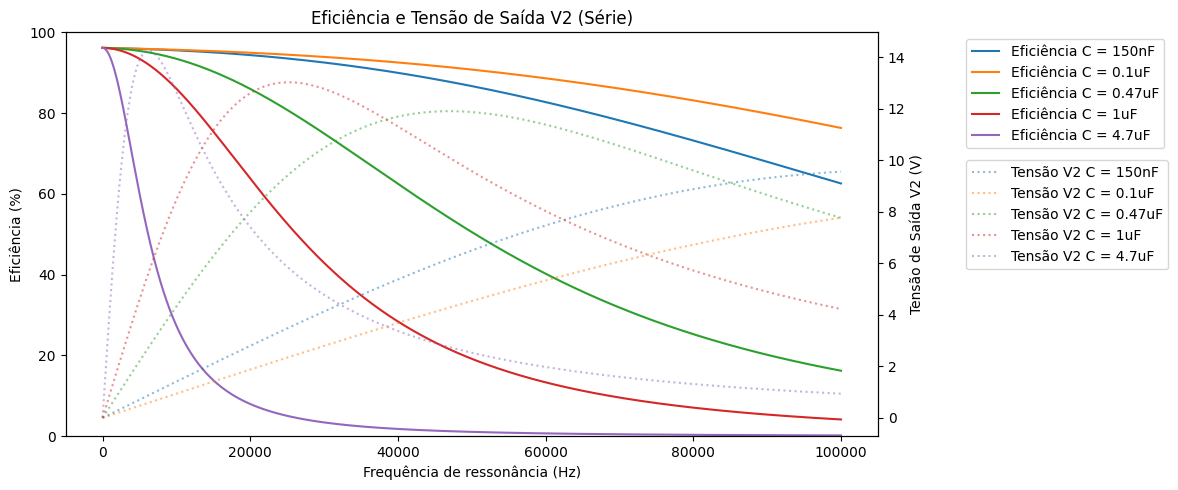

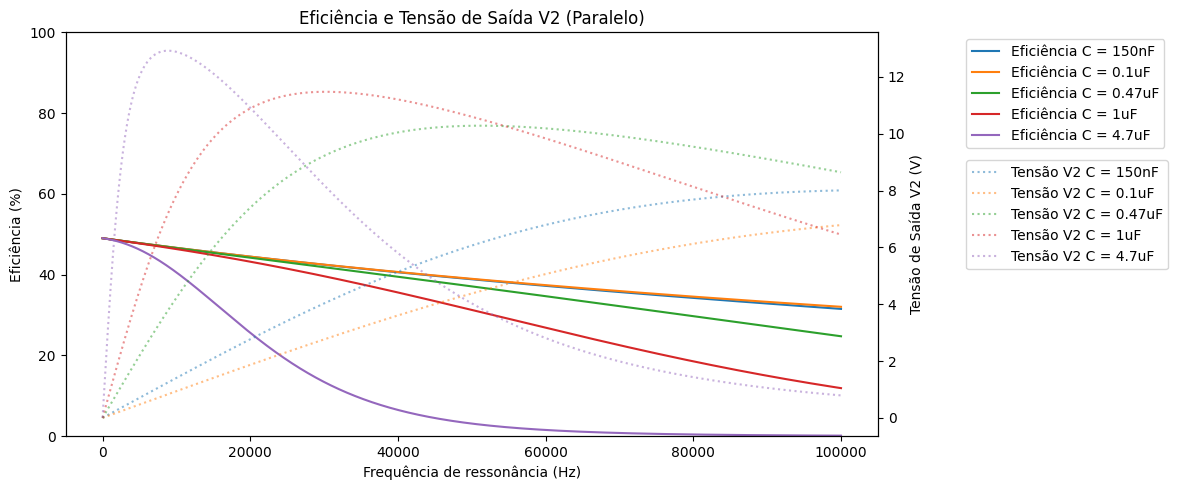

In [5]:
# Figura 1: Eficiência e Tensão de Saída (Série)
fig2, ax2 = plt.subplots(figsize=(12, 5))

# Eixo da esquerda (Eficiência)
for i, c in enumerate(Capacitores):
    ax2.plot(fs, resultados_serie[c]['n'], linestyle='-', label=f'Eficiência C = {Css[i]}')
ax2.set_xlabel('Frequência de ressonância (Hz)')
ax2.set_ylabel('Eficiência (%)')
ax2.set_title('Eficiência e Tensão de Saída V2 (Série)')
ax2.set_ylim(0, 100)

# Criando o segundo eixo y para a tensão de saída
ax2_2 = ax2.twinx()
for i, c in enumerate(Capacitores):
    ax2_2.plot(fs, resultados_serie[c]['V2'], alpha=0.5, linestyle='dotted', label=f'Tensão V2 C = {Css[i]}')
ax2_2.set_ylabel('Tensão de Saída V2 (V)')

# Movendo as legendas para a direita do gráfico
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
ax2_2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))

# Ajustando o layout da segunda figura
fig2.tight_layout()
plt.show()



# Figura 2: Eficiência e Tensão de Saída (Paralelo)
fig1, ax1 = plt.subplots(figsize=(12, 5))

# Eixo da esquerda (Eficiência)
for i, c in enumerate(Capacitores):
    ax1.plot(fs, resultados_paralelo[c]['n'], linestyle='-', label=f'Eficiência C = {Css[i]}')
ax1.set_xlabel('Frequência de ressonância (Hz)')
ax1.set_ylabel('Eficiência (%)')
ax1.set_title('Eficiência e Tensão de Saída V2 (Paralelo)')
ax1.set_ylim(0, 100)

# Criando o segundo eixo y para a tensão de saída
ax1_2 = ax1.twinx()
for i, c in enumerate(Capacitores):
    ax1_2.plot(fs, resultados_paralelo[c]['V2'], alpha=0.5, linestyle='dotted', label=f'Tensão V2 C = {Css[i]}')
ax1_2.set_ylabel('Tensão de Saída V2 (V)')

# Movendo as legendas p  ara a direita do gráfico
ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
ax1_2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))

# Ajustando o layout da primeira figura
fig1.tight_layout()
plt.show()

Abaixo, segue código que plota a tensão no secundário para diferentes resistências de carga em diferentes capacitores. Esse passo é necessário por estarmos tratando de uma bateria, e ela será mais baixa apenas quando está descarregada (5Ω).  

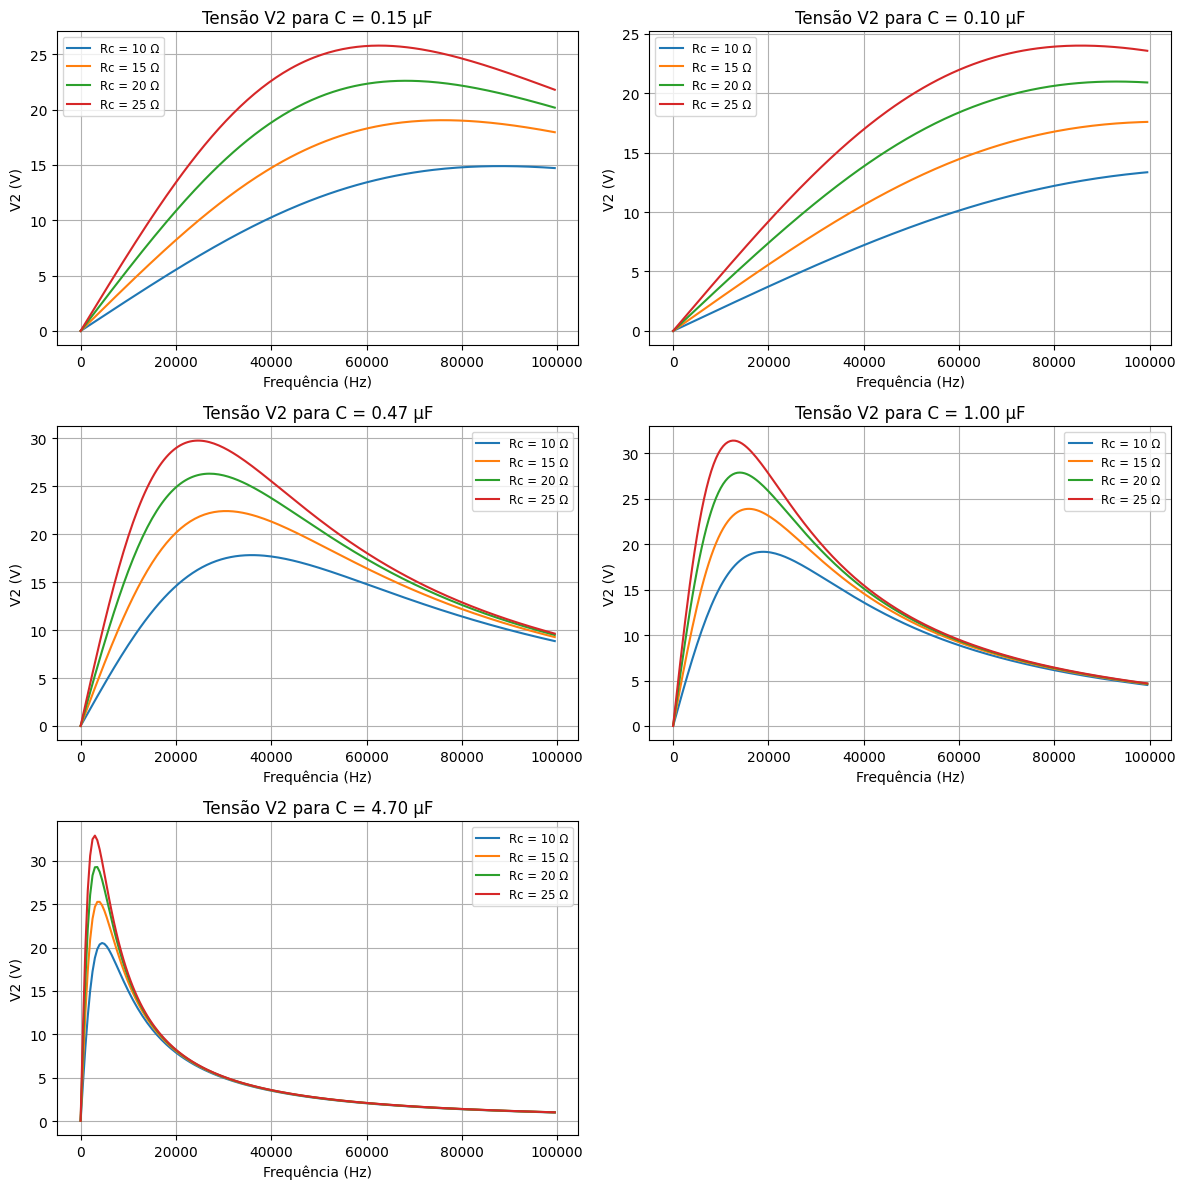

In [6]:
def plotar_para_diferentes_Rc(Rc_values, capacitores, fs, V1, k):
    n_cols = 2
    n_rows = (len(capacitores) + 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axs = axs.flatten()

    for idx, c in enumerate(capacitores):
        ax = axs[idx]
        for Rc_val in Rc_values:
            V2_por_f = []
            for f in fs:
                global Rc
                Rc = Rc_val
                _, i2, _ = CalcularTransformadorSerie(V1, c, f)
                V2 = abs(i2) * Rc
                V2_por_f.append(V2)
            ax.plot(fs, V2_por_f, label=f'Rc = {Rc_val} Ω')

        ax.set_title(f'Tensão V2 para C = {c*1e6:.2f} µF')
        ax.set_xlabel('Frequência (Hz)')
        ax.set_ylabel('V2 (V)')
        ax.grid(True)
        ax.legend(fontsize='small')

    # Esconde subgráficos não usados
    for i in range(len(capacitores), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()


Rc_values = arange(10,30,5)
plotar_para_diferentes_Rc(Rc_values, Capacitores, fs[::50], V1, k)  # fs[::50] reduz a densidade de pontos

Após análise dos gráficos acima, chegamos a conclusão que  o melhor capacitor a ser utilizado é o de 150nF posicionado em série, já que esse capacitor apresenta uma tensão acima da necessária pela bateria do drone de 4.2 V (Circuito AC requer o dobro disso) e uma eficiência de 62%, o que é aceitável em uma frequência de 100kHz. Os gráficos abaixo ajudam a observar esses valores. Além disso, já é possível calcular o valor de indutância reativa das bobinas, como observado abaixo

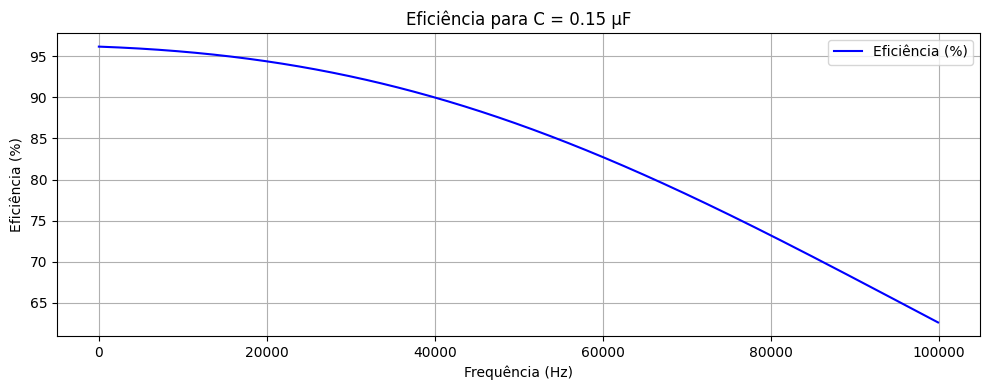

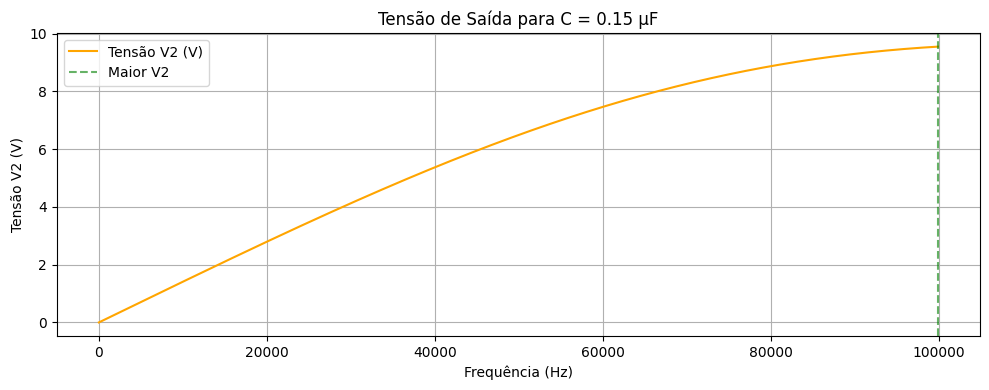

Menor eficiência:
{'f': np.float64(99901.0), 'valor': np.float64(62.63006786382547)}
Maior tensão V2:
{'f': np.float64(99901.0), 'valor': np.float64(9.552629531119285)}
L1:1.6886863940389634e-05


In [7]:
def encontrar_pico_eficiencia_tensao(c_escolhido, fs, V1, Rc, k):
    # Inicializa dicionários para armazenar os melhores resultados:
    # menor eficiência e maior tensão V2
    melhores_resultados = {
        'menor_eficiencia': {'f': None, 'valor': float('inf')},
        'maior_V2': {'f': None, 'valor': -1}
    }

    # Listas para armazenar os valores calculados ao longo da frequência
    eficiencias = []
    tensoes_V2 = []

    # Loop em cada frequência
    for f in fs:
        # Calcula correntes no circuito para a frequência atual
        i1, i2, _ = CalcularTransformadorSerie(V1, c_escolhido, f)

        # Calcula tensão de saída no resistor de carga
        V2 = abs(i2) * Rc

        # Calcula potência dissipada na carga
        P_carga = abs(i2)**2 * Rc

        # Calcula potência fornecida pela fonte (parte real do produto fasorial)
        P_fonte = np.real(V1 * np.conj(i1))

        # Eficiência (%) = (potência na carga / potência da fonte) * 100
        eficiencia = (P_carga / P_fonte) * 100 if P_fonte > 0 else 0

        # Armazena os valores nas listas para plotagem
        eficiencias.append(eficiencia)
        tensoes_V2.append(V2)

        # Verifica se essa é a menor eficiência encontrada até agora
        if eficiencia < melhores_resultados['menor_eficiencia']['valor']:
            melhores_resultados['menor_eficiencia'] = {'f': f, 'valor': eficiencia}

        # Verifica se essa é a maior tensão V2 encontrada até agora
        if V2 > melhores_resultados['maior_V2']['valor']:
            melhores_resultados['maior_V2'] = {'f': f, 'valor': V2}

    # --- Gráfico da Eficiência ---
    plt.figure(figsize=(10, 4))
    plt.plot(fs, eficiencias, label='Eficiência (%)', color='blue')



    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Eficiência (%)')
    plt.title(f'Eficiência para C = {c_escolhido*1e6:.2f} µF')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Gráfico da Tensão de Saída V2 ---
    plt.figure(figsize=(10, 4))
    plt.plot(fs, tensoes_V2, label='Tensão V2 (V)', color='orange')

    # Marca a frequência onde ocorreu a maior tensão
    plt.axvline(melhores_resultados['maior_V2']['f'], color='green', linestyle='--', alpha=0.6,
                label='Maior V2')

    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Tensão V2 (V)')
    plt.title(f'Tensão de Saída para C = {c_escolhido*1e6:.2f} µF')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Retorna os resultados encontrados
    return melhores_resultados





c_escolhido = 150e-9
Rc = 5  
resultados = encontrar_pico_eficiencia_tensao(c_escolhido, fs[::10], V1, Rc, k)

print("Menor eficiência:")
print(resultados['menor_eficiencia'])

f = 100e3
w = 2*np.pi*f
L1 = 1/(w**2*c_escolhido)


print("Maior tensão V2:")
print(resultados['maior_V2'])
print(f"L1:{L1}")


Valores de Indutância e capacitância fixos


In [8]:
def CalcularTransformadorSerieFixos(V1, L1, L2, C1, C2, f):
    w = 2 * np.pi * f

    # Resistência das bobinas com efeito pelicular
    R1 = 372.2e-3
    R2 = 286.4e-3

    # Indutância mútua
    M = k * np.sqrt(L1 * L2)

    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1 / (w * C1))
    XC2 = complex(0, -1 / (w * C2))
    XM = complex(0, w * M)

    # Matriz de impedâncias
    Z = np.array([
        [R1 + XL1 + XC1, -XM],
        [-XM, XL2 + R2 + XC2 + Rc]
    ])
    V = np.array([V1, 0])
    i = np.dot(np.linalg.inv(Z), V)

    return i[0], i[1]



In [9]:
# Valores fixos
f = 100000  # 100 kHz
w = 2 * np.pi * f
V1 = 8
C1 = C2 = 150e-9  # 150 nF
L1 = 16.74e-6  #Valor medido
L2 = 16.42e-6  #Valor medido
Rc = 5
k = 0.2

# Série
i1, i2 = CalcularTransformadorSerieFixos(V1, L1, L2, C1, C2, f)
V2_serie = abs(i2) * Rc
P_carga = abs(i2)**2 * Rc
P_fonte = np.real(V1 * np.conj(i1))
eficiencia_serie = (P_carga / P_fonte) * 100

In [10]:
def plotar_para_diferentes_Rc_variando_k_com_max(L1, L2, C1, C2, Rc_values, k_values, f, V1):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(10, 6))

    w = 2 * np.pi * f  # Frequência fixa
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1 / (w * C1))
    XC2 = complex(0, -1 / (w * C2))

    max_k_points = []
    max_v2_points = []

    for Rc_val in Rc_values:
        V2_por_k = []

        for k_val in k_values:
            XM = complex(0, w * k_val * np.sqrt(L1 * L2))

            Z = np.array([
                [0.2 + (0.2*f)/1e5 + XL1 + XC1, -XM],
                [-XM, 0.2 + (0.2*f)/1e5 + XL2 + XC2 + Rc_val]
            ])
            V = np.array([V1, 0])
            i = np.dot(np.linalg.inv(Z), V)

            i2 = i[1]
            V2 = abs(i2) * Rc_val
            V2_por_k.append(V2)

        # Plota curva V2 x k
        ax.plot(k_values, V2_por_k, label=f'Rcarga={Rc_val} Ω')

        # Encontra ponto de máximo
        idx_max = np.argmax(V2_por_k)
        k_max = k_values[idx_max]
        v2_max = V2_por_k[idx_max]

        max_k_points.append(k_max)
        max_v2_points.append(v2_max)

        # Marca o ponto de máximo
        ax.plot(k_max, v2_max, 'o', color='olive', markersize=7)

    # Conecta os pontos máximos com linha
    ax.plot(max_k_points, max_v2_points, 'o-', color='olive', label='Pontos de máxima tensão')

    ax.set_title('Tensões de pico em função de k')
    ax.set_xlabel('Coeficiente de acoplamento magnético (k)')
    ax.set_ylabel('Tensão de pico em V')
    ax.grid(True)
    ax.legend(fontsize='small')

    plt.tight_layout()
    plt.show()


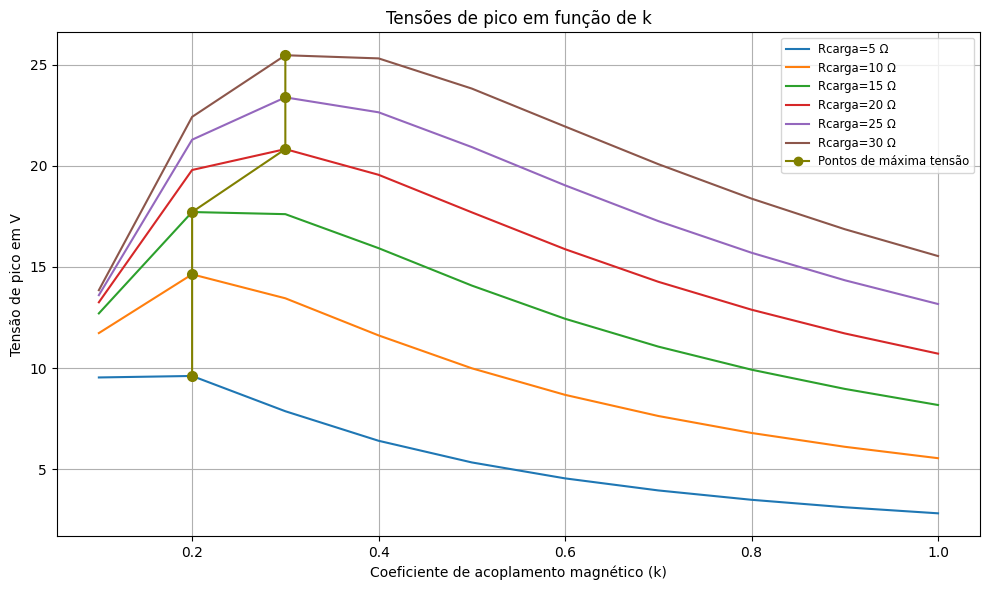

In [11]:
# Valores fixos
C1 = 150e-9
C2 = 150e-9
f = 100e3  # 100 kHz
w = 2 * np.pi * f
L1 = 16.74e-6  #Valor medido
L2 = 16.42e-6  #Valor medido

V1 = 6
k = 0.2
Rc_values = np.arange(5, 35, 5)  # Rc de 10 Ω até 95 Ω
k_values = np.arange(0.1, 1.1, 0.1)  # k de 0.1 até 1.0

plotar_para_diferentes_Rc_variando_k_com_max(L1, L2, C1, C2, Rc_values, k_values, f, V1)
